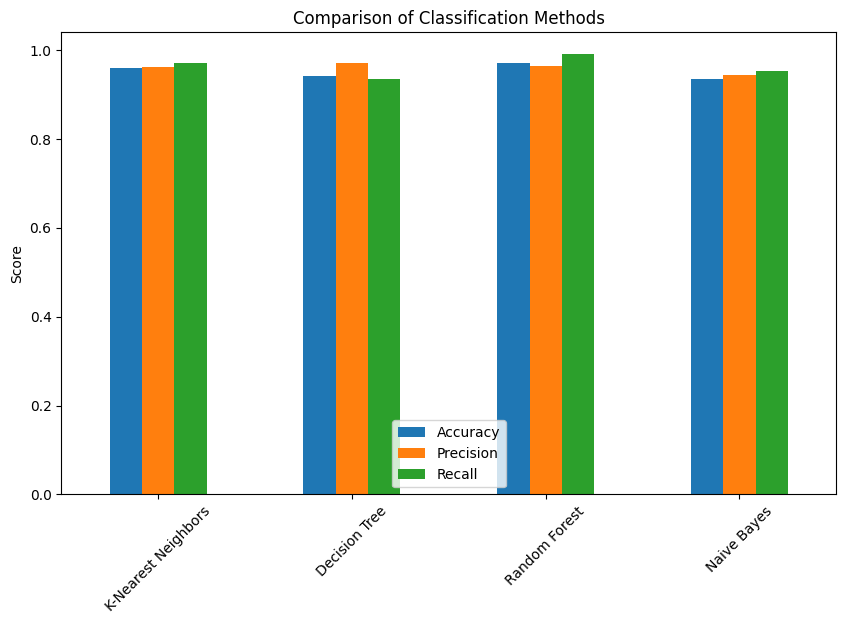

                     Accuracy  Precision    Recall
K-Nearest Neighbors  0.959064   0.963303  0.972222
Decision Tree        0.941520   0.971154  0.935185
Random Forest        0.970760   0.963964  0.990741
Naive Bayes          0.935673   0.944954  0.953704

The best classification method based on accuracy is: Random Forest
Accuracy: 0.9708, Precision: 0.9640, Recall: 0.9907.



In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Load the breast cancer dataset
cancer_data = datasets.load_breast_cancer()

# Convert dataset to a DataFrame for better visualization
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[cancer_data['feature_names']], df['target'], test_size=0.3, random_state=42)

# Standardize the features for better performance of classifiers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store evaluation metrics for each classifier
metrics = {}

# Train each classifier and calculate accuracy, precision, and recall
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

# Convert metrics dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics).T

# Plotting the metrics for comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Classification Methods")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# Print the DataFrame for analysis
print(metrics_df)

# Identify the best classifier based on accuracy
best_classifier = metrics_df['Accuracy'].idxmax()
best_accuracy = metrics_df.loc[best_classifier, 'Accuracy']
best_precision = metrics_df.loc[best_classifier, 'Precision']
best_recall = metrics_df.loc[best_classifier, 'Recall']

print(f"\nThe best classification method based on accuracy is: {best_classifier}")
print(f"Accuracy: {best_accuracy:.4f}, Precision: {best_precision:.4f}, Recall: {best_recall:.4f}.\n")

